# Tugas 2 - Data Mining

- Carilah dataset (boleh tabular minimal 8 fitur, citra/gambar, teks, dll).
- Jelaskan fitur-fiturnya dan penyelesaian problem pada dataset tersebut. 

Misal: data video lalu lintas 
1. Untuk memprediksi kemacetan 
2. Untuk meng-klasifikasi jenis kendaraan 
3. dllx Tampilkan dataset tersebut lalu analisis sederhana menggunakan python minimal berupa informasi dimensi, fitur, dan distribusi data.

In [43]:
# Analisis sederhana dataset uber_ride_bookings.csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('uber_ride_bookings.csv')
print('Dimensi dataset:', df.shape)
print('\nFitur (kolom):')
for col in df.columns:
    print('-', col)

Dimensi dataset: (150000, 21)

Fitur (kolom):
- Date
- Time
- Booking ID
- Booking Status
- Customer ID
- Vehicle Type
- Pickup Location
- Drop Location
- Avg VTAT
- Avg CTAT
- Cancelled Rides by Customer
- Reason for cancelling by Customer
- Cancelled Rides by Driver
- Driver Cancellation Reason
- Incomplete Rides
- Incomplete Rides Reason
- Booking Value
- Ride Distance
- Driver Ratings
- Customer Rating
- Payment Method


| Kolom                               | Deskripsi                            | Potensi Analisis                          |
| ----------------------------------- | ------------------------------------ | ----------------------------------------- |
| `Date`                              | Tanggal pemesanan                    | Tren harian, musiman (weekend vs weekday) |
| `Time`                              | Waktu pemesanan                      | Peak hours, analisis beban waktu          |
| `Booking ID`                        | ID unik booking                      | Identifikasi transaksi                    |
| `Booking Status`                    | Status (Completed, Cancelled, dll)   | Prediksi keberhasilan perjalanan          |
| `Customer ID`                       | ID unik customer                     | Analisis retensi, loyalitas               |
| `Vehicle Type`                      | Jenis kendaraan (Go Mini, Auto, dll) | Segmentasi berdasarkan armada             |
| `Pickup Location`                   | Lokasi awal                          | Analisis demand berdasarkan area          |
| `Drop Location`                     | Lokasi tujuan                        | Pola perjalanan populer                   |
| `Avg VTAT`                          | Rata-rata waktu driver menuju pickup | Efisiensi fleet                           |
| `Avg CTAT`                          | Durasi perjalanan rata-rata          | Estimasi waktu tempuh                     |
| `Cancelled Rides by Customer`       | Flag pembatalan customer             | Prediksi pembatalan                       |
| `Reason for cancelling by Customer` | Alasan pembatalan customer           | Insight penyebab kegagalan                |
| `Cancelled Rides by Driver`         | Flag pembatalan driver               | Kualitas pelayanan driver                 |
| `Driver Cancellation Reason`        | Alasan pembatalan driver             | Identifikasi masalah armada/driver        |
| `Incomplete Rides`                  | Flag incomplete                      | Reliability check                         |
| `Incomplete Rides Reason`           | Alasan ride tidak selesai            | Identifikasi bottleneck                   |
| `Booking Value`                     | Nilai transaksi                      | Revenue analysis                          |
| `Ride Distance`                     | Jarak tempuh                         | Efisiensi kendaraan                       |
| `Driver Ratings`                    | Rating driver (1-5)                  | Kualitas pelayanan                        |
| `Customer Rating`                   | Rating customer (1-5)                | Kepuasan driver                           |
| `Payment Method`                    | Metode pembayaran                    | Preferensi pembayaran & revenue stream    |


In [59]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hour
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000,150000.000000
mean,2024-06-30 16:42:40.320000,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584,14.034113
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000,0.000000
25%,2024-03-31 00:00:00,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000,10.000000
50%,2024-07-01 00:00:00,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000,15.000000
75%,2024-09-30 00:00:00,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000,18.000000
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,23.000000
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819,5.416906


In [44]:
print('\nContoh data:')
print(df.head())


Contoh data:
         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0

## Analisis Kolom Date and Time untuk Tren Harian dan Peak Hours

In [45]:
# === 2. Preprocessing kolom Date dan Time ===
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [46]:
# === 3. Feature Engineering ===
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
df['DayName'] = df['Date'].dt.day_name()

# Atur urutan hari biar rapi
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

Tren harian (jumlah booking per tanggal):
Date
2024-01-01    414
2024-01-02    389
2024-01-03    384
2024-01-04    414
2024-01-05    416
Name: count, dtype: int64


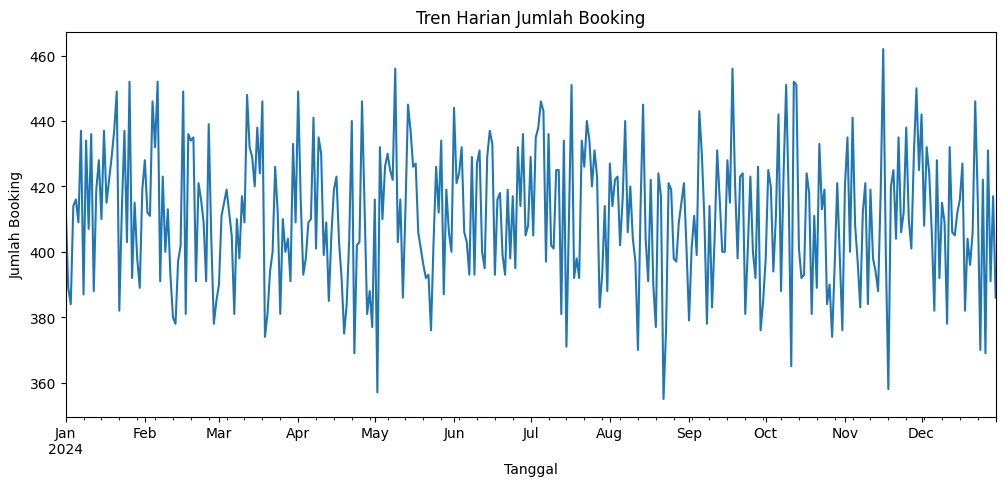

In [ ]:
# === 4a. Tren Harian ===
daily_trend = df['Date'].value_counts().sort_index()

print("Tren harian (jumlah booking per tanggal):")
print(daily_trend.head())

# Visualisasi
daily_trend.plot(figsize=(12,5), title="Tren Harian Jumlah Booking")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Booking")
plt.show()


Distribusi booking Weekend vs Weekday:
IsWeekend
False    107060
True      42940
Name: count, dtype: int64


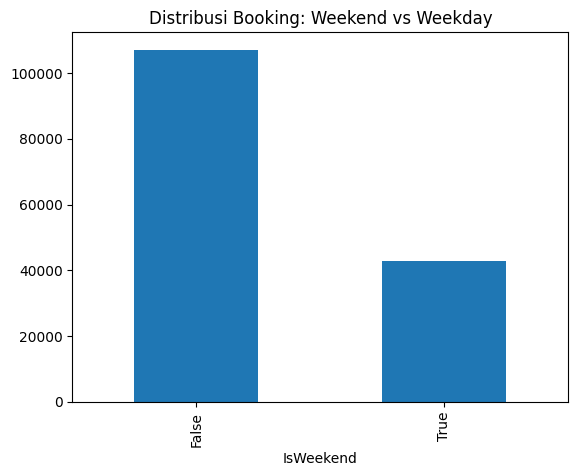

In [48]:
# === 4b. Weekend vs Weekday ===
weekend_count = df['IsWeekend'].value_counts()

print("\nDistribusi booking Weekend vs Weekday:")
print(weekend_count)

# Visualisasi
weekend_count.plot(kind="bar", title="Distribusi Booking: Weekend vs Weekday")
plt.show()


Distribusi booking per jam (Peak Hours):
Hour
0      1373
1      1360
2      1339
3      1383
4      1321
5      2786
6      4160
7      5450
8      6861
9      8234
10     9577
11     8390
12     7006
13     5470
14     7031
15     8202
16     9633
17    11044
18    12397
19    11047
20     9630
21     8103
22     5441
23     2762
Name: count, dtype: int64


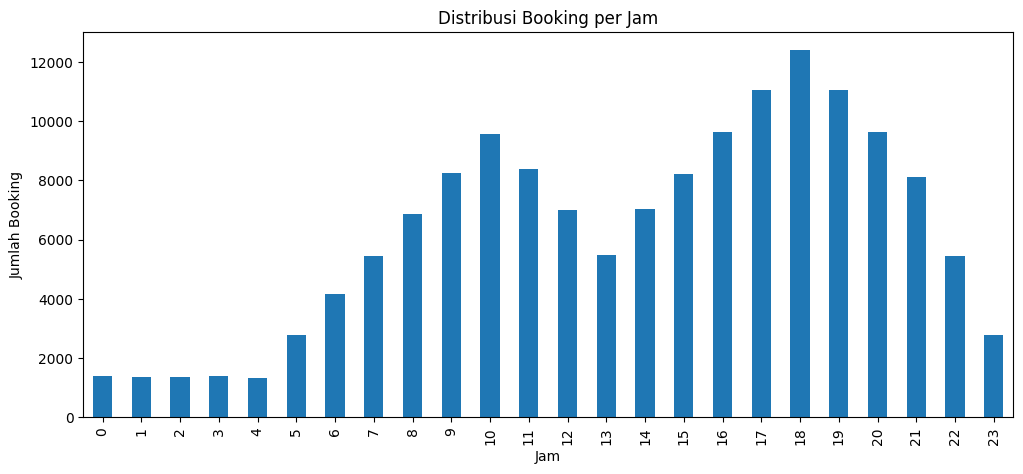

In [49]:
# === 4c. Peak Hours ===
peak_hours = df['Hour'].value_counts().sort_index()

print("\nDistribusi booking per jam (Peak Hours):")
print(peak_hours)

# Visualisasi
peak_hours.plot(kind="bar", figsize=(12,5), title="Distribusi Booking per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Booking")
plt.show()

In [50]:
# === 4d. Analisis Beban Waktu ===
avg_booking_per_hour = peak_hours.mean()
print("\nRata-rata booking per jam:", avg_booking_per_hour)


Rata-rata booking per jam: 6250.0



Distribusi booking per hari (Senin-Minggu):
DayName
Monday       21644
Tuesday      21391
Wednesday    21413
Thursday     21215
Friday       21397
Saturday     21542
Sunday       21398
Name: count, dtype: int64


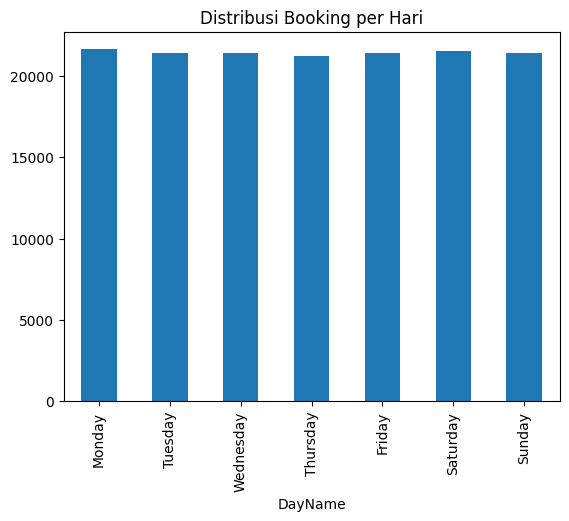

In [51]:
# === 4e. Distribusi Booking per Hari (Senin–Minggu) ===
daily_trend_by_day = df['DayName'].value_counts().reindex(order_days)

print("\nDistribusi booking per hari (Senin-Minggu):")
print(daily_trend_by_day)

# Visualisasi
daily_trend_by_day.plot(kind="bar", title="Distribusi Booking per Hari")
plt.show()

#### Analisis Weekend & Weekday
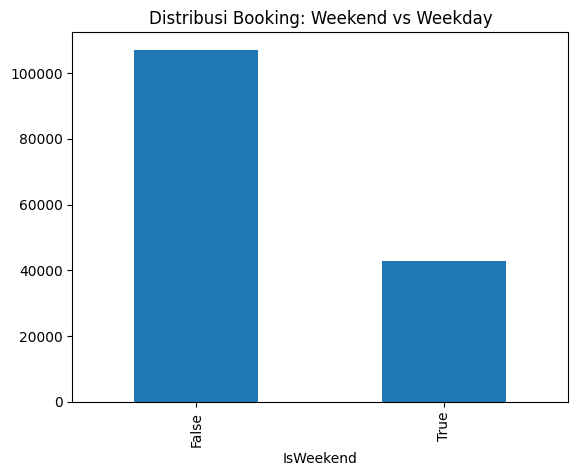
Berdasarkan grafik tersebut, saya bisa menyimpulkan bahwa tren penggunaan pemesanan Uber lebih banyak terjadi saat weekdays dengan rincian:
- Weekday : 107.060
- Weekend : 42.940

Interpretasi:
Pemesanan lebih banyak terjadi pada hari kerja (weekday) dibandingkan akhir pekan (weekend). Hal ini kemungkinan besar dipengaruhi oleh aktivitas rutin seperti berangkat kerja, sekolah, atau perjalanan bisnis.

#### Analisis Distribusi Booking Tiap Jam
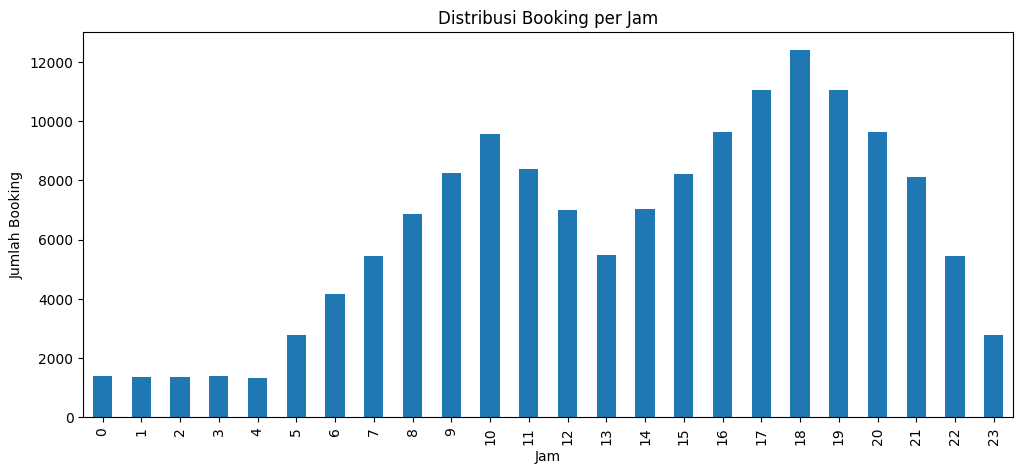
Berdasarkan grafik tersebut, saya simpulkan bahwa peak hours booking time diatas rata-rata terjadi saat jam 8 - 12 dan 14 - 21. Dengan rincian sebagai berikut:
- 8      6861
- 9      8234
- 10     9577
- 11     8390
- 12     7006
- 14     7031
- 15     8202
- 16     9633
- 17    11044
- 18    12397
- 19    11047
- 20     9630
- 21     8103

Interpretasi:
Tren ini sangat konsisten dengan pola aktivitas masyarakat:
Pagi → perjalanan ke kantor/sekolah.
Sore/Malam → perjalanan pulang kerja, aktivitas sosial, atau hiburan.

#### Potensi problem:
1. Prediksi demand berdasarkan hari atau peak hour. Hal ini membantu uber untuk memberikan persentase upah lebih saat weekday agar jumlah pengemudi lebih banyak untuk memenuhi demand.
2. Optimasi harga dinamis. Tarif bisa disesuaikan saat weekday karna demand lebih tinggi (bisa lebih tinggi atau lebih rendah tergantung analisis lebih lanjut).
3. Dynamic pricing and promo strategy. Hal ini membantu uber untuk membuat strategi promo dan harga saat peak hour.

## Analisis Vehicle Type

In [52]:
# 1. Identifikasi unique values
print("Unique Vehicle Types:", df['Vehicle Type'].nunique())
print("List Vehicle Types:\n", df['Vehicle Type'].unique())

# 2. Hitung distribusi frekuensi & persentase
vehicle_counts = df['Vehicle Type'].value_counts()
vehicle_percent = df['Vehicle Type'].value_counts(normalize=True) * 100

vehicle_summary = pd.DataFrame({
    'Count': vehicle_counts,
    'Percentage (%)': vehicle_percent.round(2)
})

print("\nDistribusi Vehicle Type:")
display(vehicle_summary)

Unique Vehicle Types: 7
List Vehicle Types:
 ['eBike' 'Go Sedan' 'Auto' 'Premier Sedan' 'Bike' 'Go Mini' 'Uber XL']

Distribusi Vehicle Type:


,Count,Percentage (%)
Vehicle Type,,
Auto,37419,24.95
Go Mini,29806,19.87
Go Sedan,27141,18.09
Bike,22517,15.01
Premier Sedan,18111,12.07
eBike,10557,7.04
Uber XL,4449,2.97


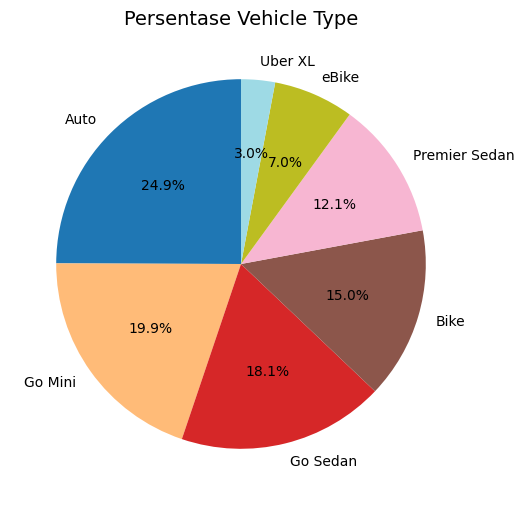

In [53]:
plt.figure(figsize=(6,6))
vehicle_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title("Persentase Vehicle Type", fontsize=14)
plt.ylabel("")  # hide y-label
plt.show()

#### Analisis Vehicle Type
1. Dominasi Kendaraan Ekonomi & Praktis
    - Jenis kendaraan Auto (mirip bajaj/angkot modern) menjadi pilihan terbanyak dengan 24 95%, diikuti oleh Go Mini dan Go Sedan.
    - Hipotesisnya adalah menunjukkan preferensi pengguna terhadap kendaraan dengan harga terjangkau dan daya tampung standar.

2. Segmen Premium rendah
    - Premier Sedan (12.07%) dan Uber XL (2.97%) menunjukkan permintaan terhadap kendaraan premium/kapasitas besar masih kecil dibandingkan kendaraan reguler.
    - Hipotesisnya karena harga yang relatif tinggi atau karena hanya digunakan untuk kebutuhan khusus (perjalanan bisnis, keluarga besar, acara khusus).

#### Potensi Problem:
Classification:
- Memprediksi jenis kendaraan yang kemungkinan dipilih pengguna berdasarkan personalisasi, waktu pemesanan, atau jarak perjalanan, biaya (Rekomendasi otomatis kendaraan ke user)
- Mengelompokkan jenis kendaraan berdasarkan pola pemesanan (ex: cluster kendaraan low-cost (auto, go mini, go sedan), cluster kendaraan premium (premier sedan, uber xl), cluster eco friendy (bike, ebike))
    - Segmentasi pasar untuk memberikan promosi per cluster
    - Optimasi harga dinamis per kelompok kendaraan

## Analisis Distribusi Booking Status

In [54]:
booking_status_distribution = df['Booking Status'].value_counts()
booking_status_distribution_percentage = df['Booking Status'].value_counts(normalize = True) * 100

booking_status_distribution_summary = pd.DataFrame({
    'Count': booking_status_distribution,
    'Percentage (%)': booking_status_distribution_percentage.round(2)
})

print("Distribusi Booking Status:")
display(booking_status_distribution_summary)

Distribusi Booking Status:


,Count,Percentage (%)
Booking Status,,
Completed,93000,62.0
Cancelled by Driver,27000,18.0
No Driver Found,10500,7.0
Cancelled by Customer,10500,7.0
Incomplete,9000,6.0


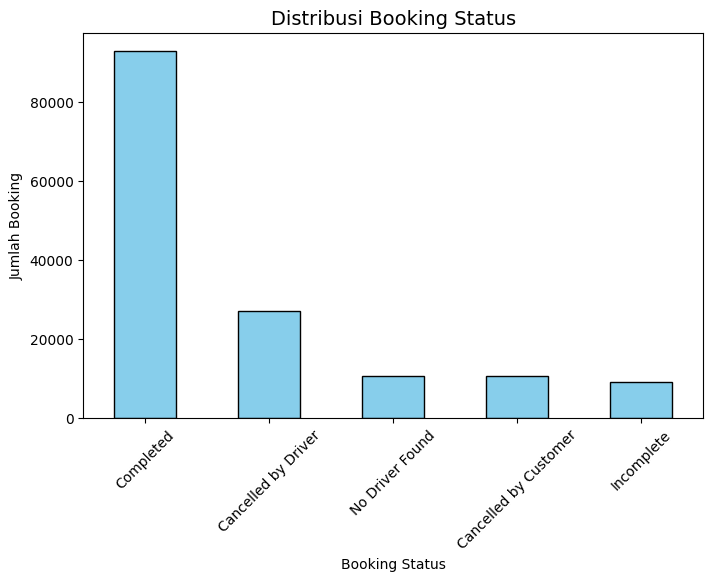

In [55]:
plt.figure(figsize=(8,5))
booking_status_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribusi Booking Status", fontsize=14)
plt.xlabel("Booking Status")
plt.ylabel("Jumlah Booking")
plt.xticks(rotation=45)
plt.show()

#### Analisis
- Dominasi Completed (62%) → mayoritas booking sukses.
- Cancelled by Driver (18%) → cukup tinggi, bisa menunjukkan masalah supply driver (ketidaksesuaian lokasi, tarif, atau jadwal).
- No Driver Found (7%) → indikasi kekurangan driver di area/jam tertentu.
- Cancelled by Customer (7%) → mungkin karena waktu tunggu lama, tarif surge, atau perubahan rencana.
- Incomplete (6%) → ada gap sistem/teknis (misalnya error pembayaran, koneksi, atau aplikasi crash).


#### Potensi Problem
- Clustering: mengelompokkan booking berdasarkan pola kegagalan atau keberhasilan untuk memberikan identifikasi area/jam yang bermasalah agar bisa diberikan persentase insentif driver lebih tinggi
    - Cluster 1 → Completed tinggi (area pusat kota, jam sibuk dengan supply cukup).
    - Cluster 2 → Cancelled by Driver dominan (area pinggiran, tarif rendah).
    - Cluster 3 → No Driver Found (wilayah supply minim).


## Analisis Metode Pembayaran

In [56]:
payment_method = df['Payment Method'].value_counts()
payment_method_percentage = df['Payment Method'].value_counts(normalize = True) * 100

payment_method_summary = pd.DataFrame({
    'Count': payment_method,
    'Percentage (%)': payment_method_percentage.round(2)
})

print("Distribusi Booking Status:")
display(payment_method_summary)

Distribusi Booking Status:


,Count,Percentage (%)
Payment Method,,
UPI,45909,45.01
Cash,25367,24.87
Uber Wallet,12276,12.04
Credit Card,10209,10.01
Debit Card,8239,8.08


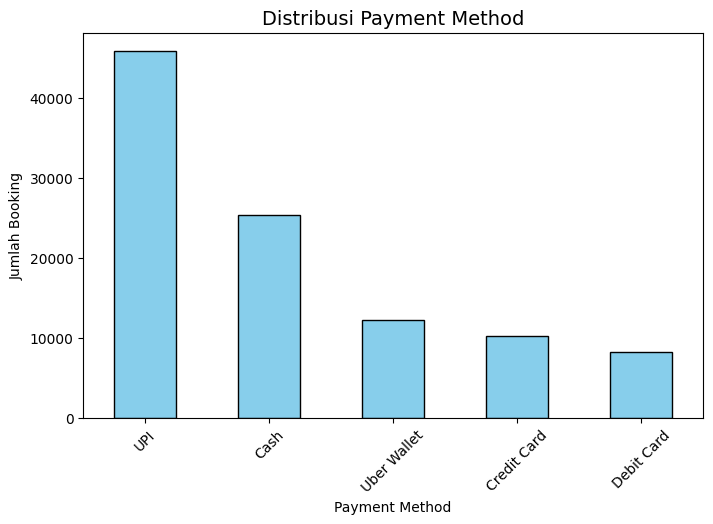

In [57]:
plt.figure(figsize=(8,5))
payment_method.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribusi Payment Method", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Jumlah Booking")
plt.xticks(rotation=45)
plt.show()

#### Analisis Metode Pembayaran yang Digunakan
- UPI (45%) → Metode pembayaran paling dominan. Artinya mayoritas pengguna sudah nyaman dengan transaksi digital instan.
- Cash (25%) → Masih signifikan, menunjukkan sebagian pengguna masih bergantung pada metode tunai, bisa karena kebiasaan atau keterbatasan akses digital.
- Uber Wallet (12%) → Relatif rendah, padahal ini metode internal yang bisa meningkatkan loyalitas pengguna.
- Credit/Debit Card (18% total) → Masih cukup besar, menunjukkan adanya segmen pengguna yang terbiasa dengan kartu.

#### Potensi Permasalahan
- Classification: Memprediksi metode pembayaran yang dipilih pelanggan berdasarkan fitur seperti jenis kendaraan, waktu perjalanan, lokasi pickup/drop-off, status booking, dan lainnya.
    - Berguna untuk personalisasi diskon, menawarkan diskon untuk pengguna yang lebih sering menggunakan bayar tunai agar pindah ke Uber Wallet / UPI

- Clustering: Mengelompokkan pelanggan berdasarkan preferensi metode pembayaran dan perilaku perjalanan.
    - Membantu tim bisnis mendesain strategi promosi spesifik ke tiap segmen pengguna.

## Analisis Reason for cancelling by Customer

In [58]:
reason_cancellation_cust = df['Reason for cancelling by Customer'].value_counts()
reason_cancellation_cust_percentage = df['Reason for cancelling by Customer'].value_counts(normalize = True) * 100

reason_cancellation_cust_summary = pd.DataFrame({
    'Count': reason_cancellation_cust,
    'Percentage (%)': reason_cancellation_cust_percentage.round(2)
})

print("Distribusi Booking Status:")
display(reason_cancellation_cust_summary)

Distribusi Booking Status:


,Count,Percentage (%)
Reason for cancelling by Customer,,
Wrong Address,2362,22.50
Change of plans,2353,22.41
Driver is not moving towards pickup location,2335,22.24
Driver asked to cancel,2295,21.86
AC is not working,1155,11.00


#### Analisis Reason for cancelling by Customer
Distribusi alasan pembatalan relatif seimbang pada 4 alasan utama: Wrong Address (22.5%), Change of Plans (22.41%), Driver not moving (22.24%), dan Driver asked to cancel (21.86%).

#### Rekomendasi Problem
Clustering: Mengelompokkan customer berdasarkan pola alasan pembatalan.

Berguna mengedukasi navigasi untuk kelompok yang sering “Wrong Address”, atau promosi fleksibilitas reschedule untuk yang sering “Change of Plans”.